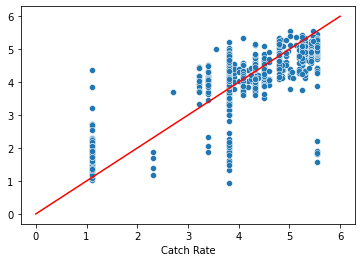

In [ ]:
# Roger's Code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

df = pd.read_csv("All_Pokemon.csv")

# 
# HP useless
useful_columns = ["Type 1", "HP", "Att", "Def", "Spa", "Spd", "Spe", "BST", "Legendary", "Catch Rate"]


df = df[useful_columns]
df = df.fillna("Null")

# transform catch rate
# df["Catch Rate"] = np.log(df["Catch Rate"])

def one_hot_encode(df, features):
    new_df = df.copy(deep=True)
    for feature in features:
        unique_vals = np.unique(df[feature].to_numpy())
        for val in unique_vals:
            new_df[feature + "_" + str(val)] = df[feature].apply(lambda x: int(x == val))
    return new_df.drop(features, axis=1)

df = one_hot_encode(df, ["Type 1"])

catch_rate_series = np.log(df["Catch Rate"])

df = df.drop("Catch Rate", axis=1)

model = LinearRegression()

model.fit(df, catch_rate_series)

# print(mse(catch_rate_series, model.predict(df)))
# print(model.score(df, catch_rate_series))

sns.scatterplot(x=catch_rate_series, y = model.predict(df))
plt.plot(np.linspace(0, 6, 2), np.linspace(0, 6, 2), color='r')
plt.show()

In [ ]:
# Roger's Code, ML approach
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("All_Pokemon.csv")
useful_columns = ["Type 1", "HP", "Att", "Def", "Spa", "Spd", "Spe", "BST", 
"Legendary", "Catch Rate",
'Final Evolution', 'Height', 'Weight', 'BMI']
# jdf.columns
# useful_columns = ["Type 1", "BST", "Legendary", "Catch Rate"]

df = df[useful_columns]

def one_hot_encode(df, features):
    new_df = df.copy(deep=True)
    for feature in features:
        unique_vals = np.unique(df[feature].to_numpy())
        for val in unique_vals:
            new_df[feature + "_" + str(val)] = df[feature].apply(lambda x: int(x == val))
    return new_df.drop(features, axis=1)

df = one_hot_encode(df, ["Type 1"])

catch_rate_series = df["Catch Rate"].apply(lambda x: x // 50).to_numpy().astype(float)

df = df.drop("Catch Rate", axis=1).to_numpy().astype(float)

x_train, x_test, y_train, y_test = train_test_split(df, catch_rate_series, test_size=0.2)

model = keras.Sequential([
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(6, activation = "softmax")
])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=800, batch_size=15)
validation_info = model.predict(x_test)
print("validation accuracy:", sum([np.argmax(x) for x in validation_info] == y_test) / len(y_test))

# exit(0)

# model.fit(df, catch_rate_series, epochs=400, batch_size=5)
# evaluate_training_result = model.evaluate(x_train, y_train)
# evaluate_test_result = model.evaluate(x_test, y_test)

# print("Evaluated training result:", evaluate_training_result)
# print("Evaluated test result:", evaluate_test_result)

predictions = model.predict(df)
# print(predictions)

argmaxed = [np.argmax(x) for x in predictions]
#print(argmaxed)
#print(argmaxed == catch_rate_series)
print("overall accuracy:", sum(argmaxed == catch_rate_series) / len(argmaxed))

55/55 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8572
Epoch 303/800
55/55 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8517
Epoch 304/800
55/55 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.8611
Epoch 305/800
55/55 [==============================] - 0s 3ms/step - loss: 0.2083 - accuracy: 0.9407
Epoch 306/800
55/55 [==============================] - 0s 3ms/step - loss: 0.2589 - accuracy: 0.9136
Epoch 307/800
55/55 [==============================] - 0s 3ms/step - loss: 0.2935 - accuracy: 0.8915
Epoch 308/800
55/55 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.9057
Epoch 309/800
55/55 [==============================] - 0s 3ms/step - loss: 0.2639 - accuracy: 0.8960
Epoch 310/800
55/55 [==============================] - 0s 4ms/step - loss: 0.3249 - accuracy: 0.8732
Epoch 311/800
55/55 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.9036
Epoc

In [ ]:
# Justin's Code

from sklearn import preprocessing, tree
import matplotlib.pyplot as plt

jdf = pd.read_csv("All_Pokemon.csv")
# BST is all of the stats added up together
# BMI is calculated with Weight/ Height**2

# Take experience level [more experience -> harder to catch?]
# Specific forms to help our ML model out a bit for these pokemon
# Heigh + Weight -> thiCC pokemon harder to catch?
columns_to_grab = ["Type 1", "HP", "Att", "Def", "Spa", "Spd", "Spe", "BST", 
"Legendary", "Catch Rate",
'Final Evolution', 'Height', 'Weight', 'BMI']

# jdf.columns
jdf_ohe = pd.get_dummies(jdf[columns_to_grab])

split_into = 50

catch_rate = jdf_ohe["Catch Rate"].apply(lambda x: x // split_into).to_numpy().astype(float)
jdf_ohe.drop('Catch Rate', axis = 1, inplace = True)
jdf_ohe

X_train, X_test, Y_train, Y_test = train_test_split(jdf_ohe, catch_rate, test_size=0.3)

dtree_model = tree.DecisionTreeClassifier(max_depth = 3)
dtree_model.fit(X_train, Y_train)
dtree_model.score(X_train, Y_train)

0.5678670360110804

In [ ]:
jdf

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,...,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,...,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


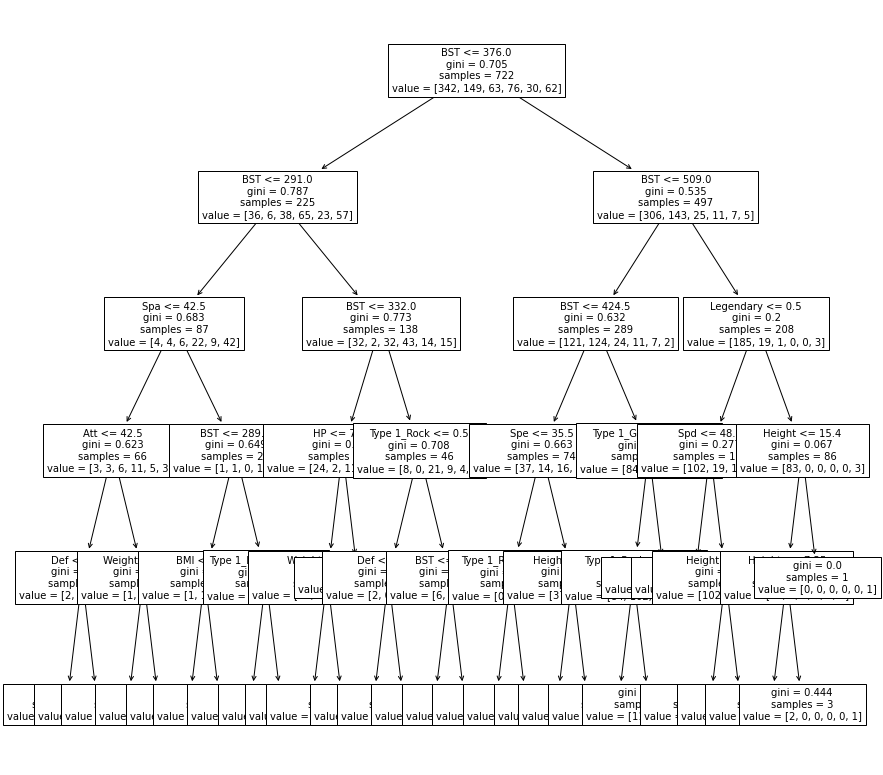

In [ ]:
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(dtree_model, fontsize=10, feature_names= X_train.columns); 

In [ ]:
fig.savefig("decistion_tree.png")

In [ ]:
pip install dtreeviz

     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 46 kB 5.3 MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67922 sha256=8f17111208d26e250b5cb396715d5273a30a2c08d644ccc75310b5cfaccaa3f1
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


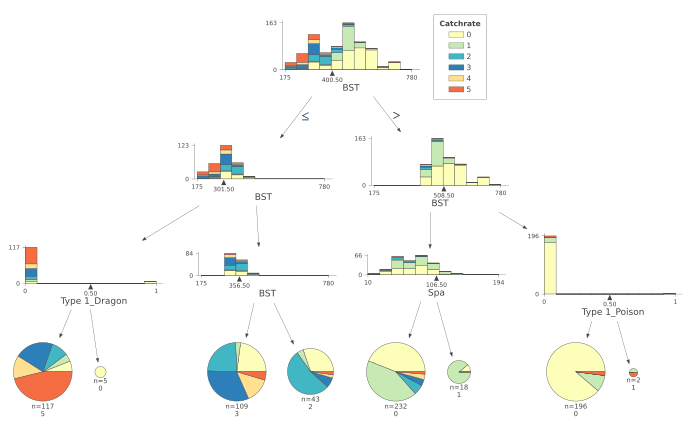

In [ ]:
# Cited from: https://mljar.com/blog/visualize-decision-tree/
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dtree_model, X_train, Y_train,
                target_name="Catchrate",
                feature_names=X_train.columns,
                class_names=list(np.arange(255 % split_into + 1)))

viz

In [ ]:
viz.save("decision_tree.svg")
#Use this https://svgtopng.com/

In [ ]:
import sklearn.ensemble

In [ ]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators = 20, max_depth = 7)
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.8227146814404432

In [ ]:
#Cited from https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
# from sklearn.tree import export_graphviz
# # Export as dot file

# export_graphviz(clf.estimators_[0], out_file='clf.dot', 
#                 feature_names = X_train.columns,
#                 class_names = list(np.arange(255 % split_into + 1)),
#                 rounded = True, proportion = False, precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [ ]:
jfmodel = keras.Sequential([
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(6, activation = "softmax")
])

jfmodel.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

jfmodel.fit(X_train, Y_train, epochs=800, batch_size=15)
validation_info = jfmodel.predict(X_test)
print("validation accuracy:", sum([np.argmax(x) for x in validation_info] == Y_test) / len(Y_test))

# exit(0)

# model.fit(df, catch_rate_series, epochs=400, batch_size=5)
# evaluate_training_result = model.evaluate(x_train, y_train)
# evaluate_test_result = model.evaluate(x_test, y_test)

# print("Evaluated training result:", evaluate_training_result)
# print("Evaluated test result:", evaluate_test_result)

predictions = jfmodel.predict(jdf_ohe)
# print(predictions)

argmaxed = [np.argmax(x) for x in predictions]
#print(argmaxed)
#print(argmaxed == catch_rate_series)
print("overall accuracy:", sum(argmaxed == catch_rate) / len(argmaxed))

49/49 [==============================] - 0s 4ms/step - loss: 0.5449 - accuracy: 0.8153
Epoch 303/800
49/49 [==============================] - 0s 5ms/step - loss: 0.4108 - accuracy: 0.8534
Epoch 304/800
49/49 [==============================] - 0s 4ms/step - loss: 0.4638 - accuracy: 0.8161
Epoch 305/800
49/49 [==============================] - 0s 5ms/step - loss: 0.4386 - accuracy: 0.8318
Epoch 306/800
49/49 [==============================] - 0s 5ms/step - loss: 0.4030 - accuracy: 0.8630
Epoch 307/800
49/49 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.8458
Epoch 308/800
49/49 [==============================] - 0s 6ms/step - loss: 0.3875 - accuracy: 0.8486
Epoch 309/800
49/49 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.8051
Epoch 310/800
49/49 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.8386
Epoch 311/800
49/49 [==============================] - 0s 5ms/step - loss: 0.3868 - accuracy: 0.8560
Epoc

In [ ]:
jdf['Type 1'].value_counts()


Water       131
Normal      114
Grass        91
Bug          81
Psychic      77
Fire         64
Electric     59
Rock         59
Dark         46
Dragon       42
Fighting     42
Ghost        41
Ground       41
Poison       40
Ice          38
Steel        36
Fairy        22
Flying        8
Name: Type 1, dtype: int64

In [ ]:
jdf['Type 2'].value_counts() + jdf['Type 1'].value_counts()

Bug          90
Dark         72
Dragon       72
Electric     70
Fairy        63
Fighting     73
Fire         81
Flying      120
Ghost        68
Grass       119
Ground       80
Ice          56
Normal      124
Poison       77
Psychic     119
Rock         74
Steel        71
Water       151
dtype: int64

Text(0.5, 1.0, 'Count of Types')

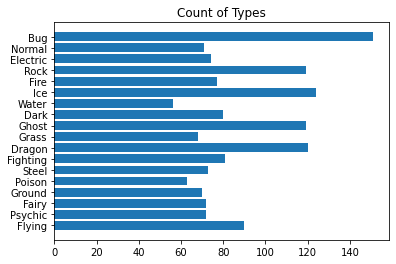

In [ ]:
plt.barh(jdf['Type 2'].value_counts().index, (jdf['Type 2'].value_counts() + jdf['Type 1'].value_counts()).values)
plt.title('Count of Types')

Index(['Flying', 'Psychic', 'Fairy', 'Ground', 'Poison', 'Steel', 'Fighting',
       'Dragon', 'Grass', 'Ghost', 'Dark', 'Water', 'Ice', 'Fire', 'Rock',
       'Electric', 'Normal', 'Bug'],
      dtype='object')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b48f097f-607c-418a-bf15-19e0a2612faf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>